# NN Model

Here we will be creating our Neural Network model. The plan is to have 10 different networks that calculate performance of a player compared to all **relevant** opposing team positions. (e.g. a center's performance against enemy defenders) These ten networks will act as input for a 'master' network that will then decide the outcome of this match.

In [19]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

In [22]:
df = pd.read_csv('../finalized_scripts/datasets/player_stats/hollinger-player-stats.csv')
df

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,1.0,MarkquisNowell,1,4.0,0.532,51.5,0.0,0.0,0.0,0.0,0.0,55.49,2.7,0.1
1,2.0,DrewPeterson,1,3.0,1.500,50.0,0.0,0.0,0.0,0.0,0.0,43.55,1.5,0.0
2,3.0,JoelEmbiid,34,34.0,0.645,15.4,10.1,0.0,0.0,0.0,0.0,34.35,410.1,13.7
3,4.0,HamidouDiallo,2,2.5,0.500,25.0,25.0,0.0,0.0,0.0,0.0,32.95,0.0,0.0
4,5.0,AdamaSanogo,3,3.7,0.926,0.0,18.8,0.0,0.0,0.0,0.0,32.68,3.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536.0,JohnnyJuzang,2,3.0,0.000,25.0,0.0,0.0,0.0,0.0,0.0,-13.59,-2.2,-0.1
536,537.0,JoshuaPrimo,1,5.0,0.500,0.0,60.0,0.0,0.0,0.0,0.0,-15.51,0.0,0.0
537,538.0,PeteNance,2,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-18.79,-1.8,-0.1
538,539.0,DmytroSkapintsev,2,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-19.04,-0.9,-0.0


In [21]:
df.drop(columns=['RK'], inplace=True)
df.to_csv('./datasets/hollinger-player-stats.csv', index=True)

Above we've only fixed the index. The data from the website we've gained our player data from had missing values in the RK column which was also being used as the index.

In [28]:
df = pd.read_csv('../finalized_scripts/datasets/team_stats/hollinger-team-stats.csv')
df

,RK,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
0,1.0,Boston,100.6,18.9,11.2,24.6,0.0,51.9,57.1,60.4,118.7,109.0
1,2.0,LAClippers,99.4,19.1,11.7,25.2,0.0,51.1,56.9,60.7,117.9,111.4
2,NaN,Indiana,104.8,21.2,11.7,23.8,0.0,48.6,58.2,60.9,117.9,116.8
3,4.0,OklahomaCity,102.2,19.7,11.2,20.8,0.0,47.6,57.5,61.2,117.7,110.0
4,5.0,Milwaukee,103.7,19.1,11.4,21.7,0.0,49.8,57.4,60.8,117.4,113.8
5,6.0,Philadelphia,101.4,18.0,10.6,25.4,0.0,49.5,53.8,58.4,115.9,112.2
6,7.0,NewOrleans,100.9,19.5,11.8,25.4,0.0,51.2,55.8,59.1,115.6,110.6
7,NaN,Atlanta,104.0,18.2,11.4,28.0,0.0,50.1,53.9,58.0,115.6,118.4
8,NaN,Dallas,102.8,18.5,11.1,22.5,0.0,48.1,56.2,59.3,115.6,113.8
9,10.0,Phoenix,101.3,19.4,13.4,24.6,0.0,51.2,56.8,60.8,115.5,112.1


In [29]:
df.drop(columns=['RK'], inplace=True)

In [30]:
df.to_csv('./datasets/hollinger-team-stats.csv', index=True)

In [39]:
teams = pd.read_csv('./datasets/hollinger-team-stats.csv', index_col=0)
players = pd.read_csv('./datasets/hollinger-player-stats.csv', index_col=0)

In [38]:
teams

,TEAM,PACE,AST,TO,ORR,DRR,REBR,EFF FG%,TS%,OFF EFF,DEF EFF
RK,,,,,,,,,,,
0,Boston,100.6,18.9,11.2,24.6,0.0,51.9,57.1,60.4,118.7,109.0
1,LAClippers,99.4,19.1,11.7,25.2,0.0,51.1,56.9,60.7,117.9,111.4
2,Indiana,104.8,21.2,11.7,23.8,0.0,48.6,58.2,60.9,117.9,116.8
3,OklahomaCity,102.2,19.7,11.2,20.8,0.0,47.6,57.5,61.2,117.7,110.0
4,Milwaukee,103.7,19.1,11.4,21.7,0.0,49.8,57.4,60.8,117.4,113.8
5,Philadelphia,101.4,18.0,10.6,25.4,0.0,49.5,53.8,58.4,115.9,112.2
6,NewOrleans,100.9,19.5,11.8,25.4,0.0,51.2,55.8,59.1,115.6,110.6
7,Atlanta,104.0,18.2,11.4,28.0,0.0,50.1,53.9,58.0,115.6,118.4
8,Dallas,102.8,18.5,11.1,22.5,0.0,48.1,56.2,59.3,115.6,113.8


In [40]:
players

,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
RK,,,,,,,,,,,,,
0,MarkquisNowell,1,4.0,0.532,51.5,0.0,0.0,0.0,0.0,0.0,55.49,2.7,0.1
1,DrewPeterson,1,3.0,1.500,50.0,0.0,0.0,0.0,0.0,0.0,43.55,1.5,0.0
2,JoelEmbiid,34,34.0,0.645,15.4,10.1,0.0,0.0,0.0,0.0,34.35,410.1,13.7
3,HamidouDiallo,2,2.5,0.500,25.0,25.0,0.0,0.0,0.0,0.0,32.95,0.0,0.0
4,AdamaSanogo,3,3.7,0.926,0.0,18.8,0.0,0.0,0.0,0.0,32.68,3.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,JohnnyJuzang,2,3.0,0.000,25.0,0.0,0.0,0.0,0.0,0.0,-13.59,-2.2,-0.1
536,JoshuaPrimo,1,5.0,0.500,0.0,60.0,0.0,0.0,0.0,0.0,-15.51,0.0,0.0
537,PeteNance,2,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-18.79,-1.8,-0.1


## Defining positions

Now that we have a less error prone method of organizing our data, we can start working on our theory. If the theory is not clear by now. Let me show an illustration.

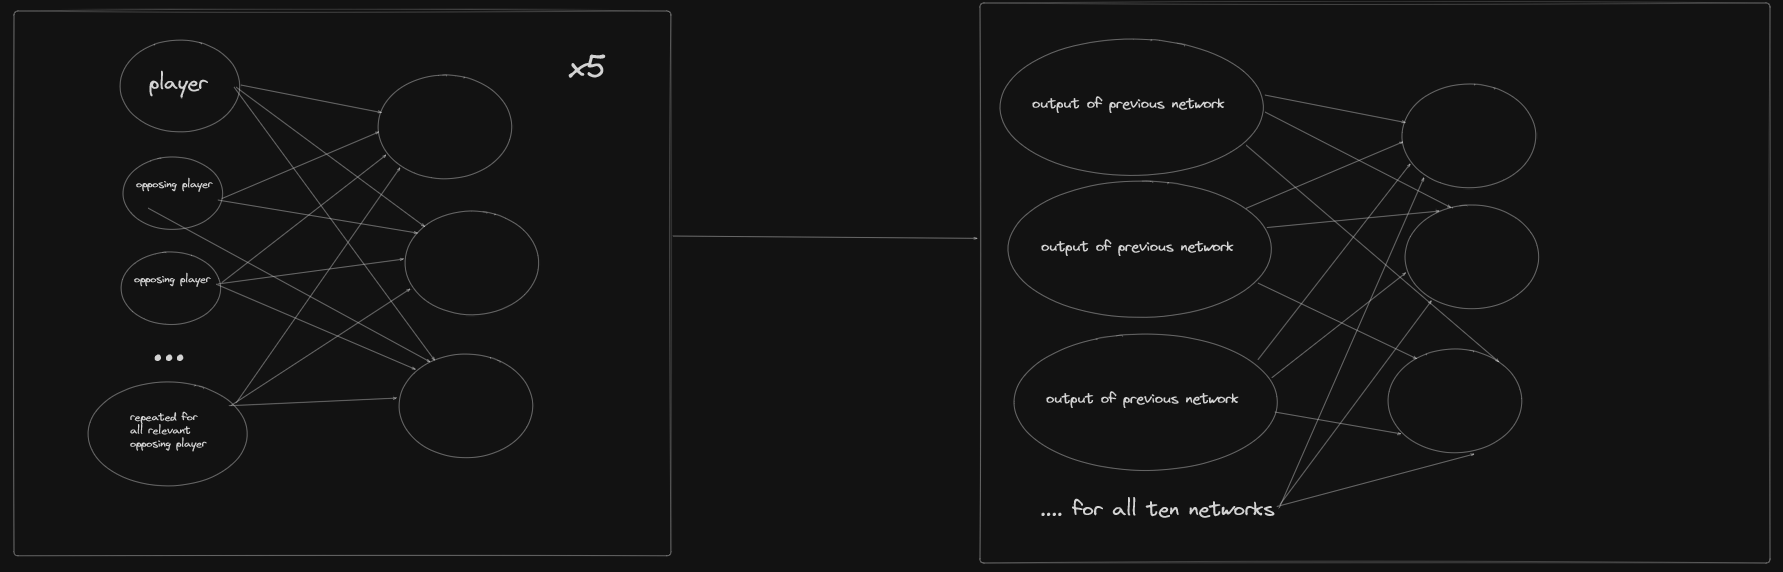


As we can see in the illustration above, there are five networks. That are completely unrelated from each other, in the sense that they are analyzing player's in specific positions, trying to predict their performance.

This could help make our data more digestible to our network, or could lead to more noise.

We shall see.

**NOTE**: There is a mistake in that illustration, it says that the base networks are repeated 5 times for every position on basketball team. This is not how things are going to be done, since there are two teams with 5 players. Therefore it will be repeated 10 times.